In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## For Google Colab
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/My\ Drive/Colab_Notebooks/Philippe_COVID_2023/timevaryingCOVIDpaper/PHU_Data


# Summary of all PHUs

In [4]:
Data = np.zeros([34,365])
current_directory = os.getcwd()
directory_path = current_directory
files = os.listdir(directory_path)

for ii in range(0,34):
  if ii < 9:
    target_name_part = "0"+str(ii+1)+"-"
  else:
    target_name_part = str(ii+1)+"-"
  for file in files:
      if target_name_part in file:
          target_file = file
          break
  else:
      raise FileNotFoundError(f"Could not find any file containing '{target_name_part}'.")

  Data[ii,:] = np.genfromtxt(target_file, delimiter=',')

population_by_phu = np.genfromtxt('population_by_phu.csv', delimiter=',')

# 00 - Algoma = 112764
# 01 - Brant = 144937
# 02 - Chatham-Kent = 104316
# 03 - Durham Regional = 696992
# 04 - Eastern Ontario  = 210276
# 05 - Grey Bruce = 174301
# 06 - Haldimand-Norfolk  =	116706
# 07 - Haliburton, Kawartha, Pine Ridge District  =	189183
# 08 - Halton Regional  = 	596637
# 09 - Hamilton  =	569353
# 10 - Hastings and Prince Edward Counties  =	171450
# 11 - Huron Perth  =	142931
# 12 - Kingston, Frontenac and Lennox and Addington  = 	206962
# 13 - Lambton  = 	128154
# 14 - Leeds, Grenville and Lanark District  = 	179830
# 15 - Middlesex-London  = 	500563
# 16 - Niagara Regional Area  = 	477941
# 17 - North Bay Parry Sound  =	129362
# 18 - Northwestern  =	77338
# 19 - Ottawa  =	1017449
# 20 - Oxford Elgin St. Thomas  =	216533
# 21 - Peel Regional  =	1451022
# 22 - Peterborough County-City  =	147681
# 23 - Porcupine  = 	81188
# 24 - Renfrew County and District  =	107522
# 25 - Simcoe Muskoka District  =	599843
# 26 - Sudbury and District  =	202431
# 27 - Thunder Bay District  =	152885
# 28 - Timiskaming  =	32394
# 29 - City of Toronto  = 	2794356
# 30 - Waterloo  =	587165
# 31 - Wellington-Dufferin-Guelph  =	307283
# 32 - Windsor-Essex County  =	422860
# 33 - York Regional  =	1173334

/var/folders/lr/4h04vl_92s3d0hrwg37l8g740000gn/T/ipykernel_9999/874260104.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(1, figsize=(5,3))


<Figure size 640x480 with 0 Axes>

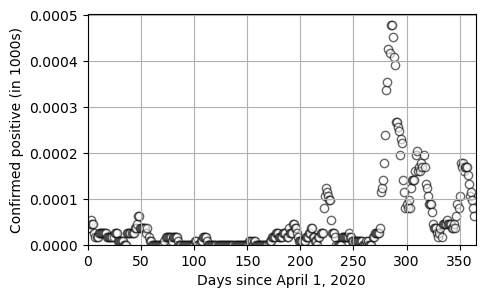

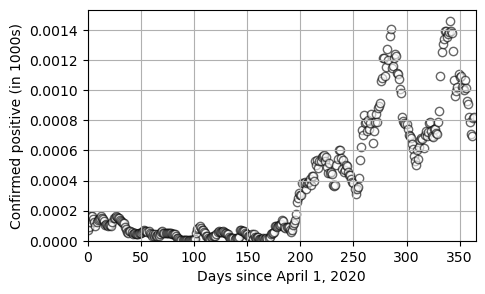

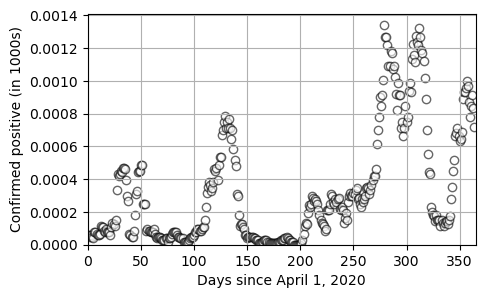

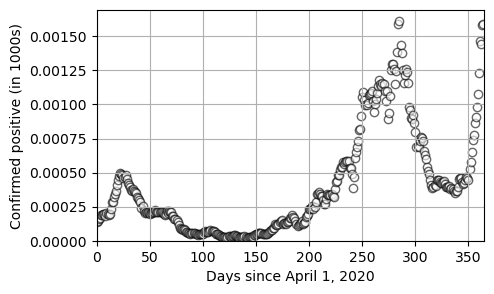

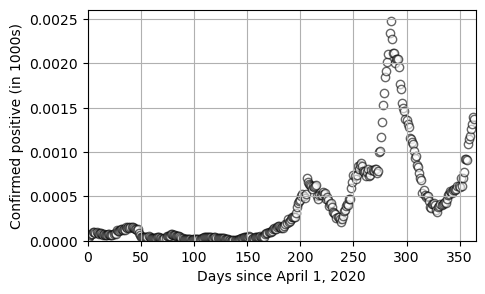

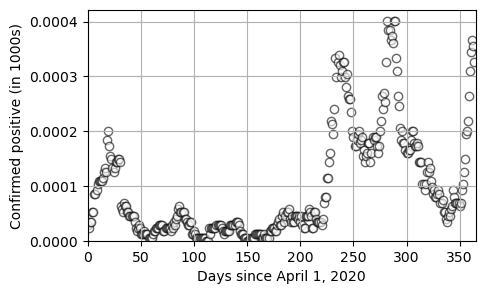

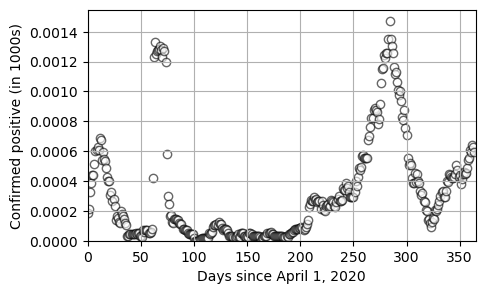

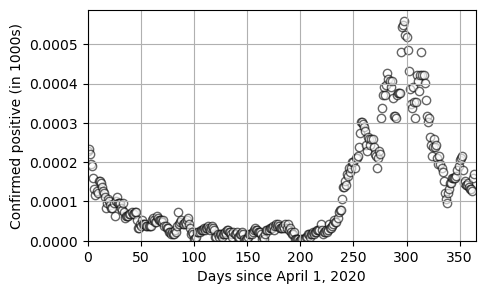

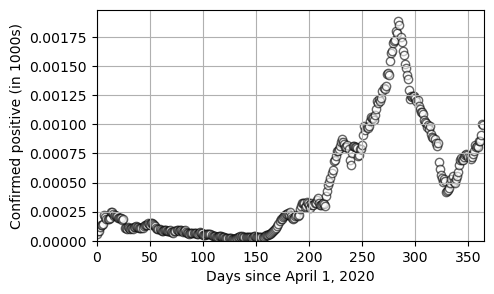

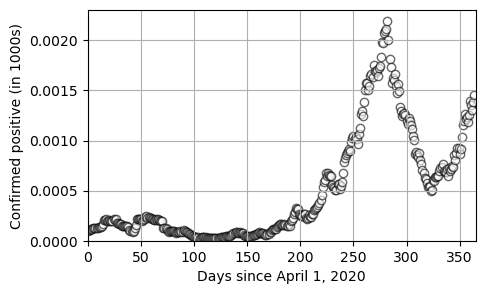

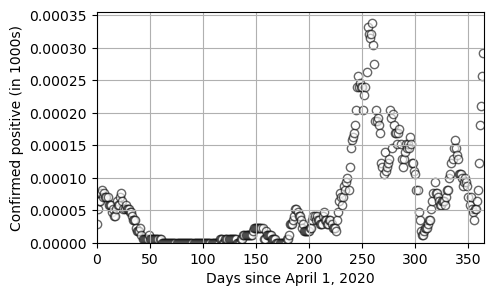

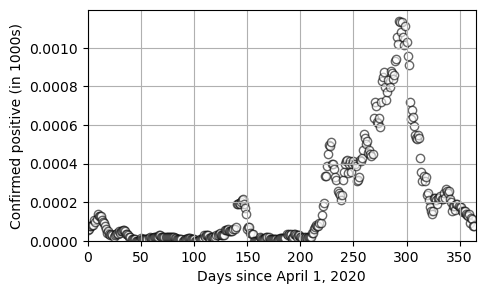

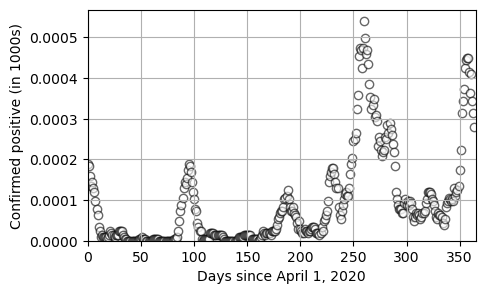

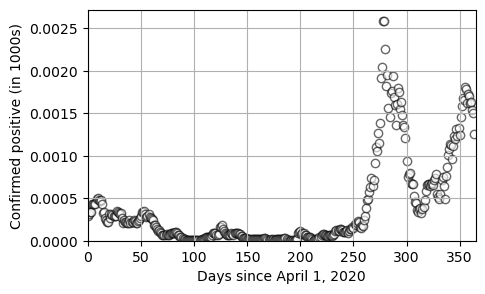

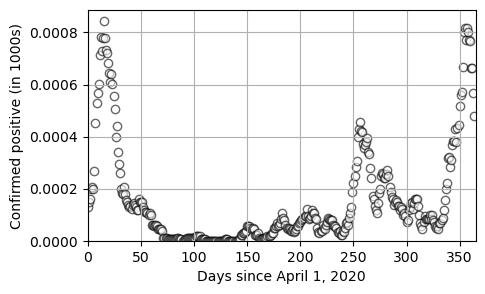

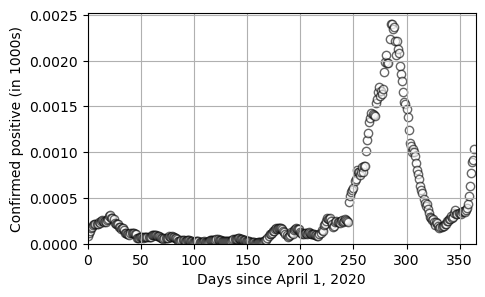

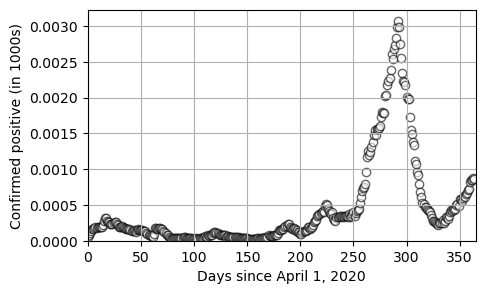

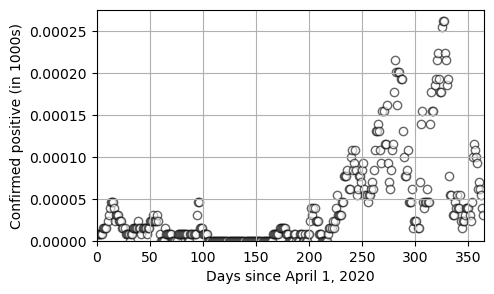

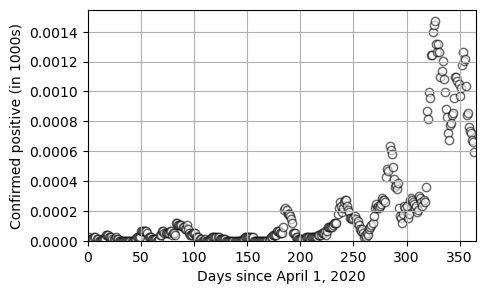

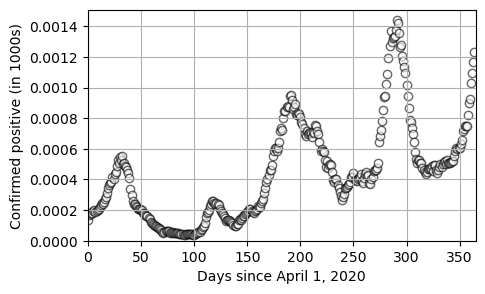

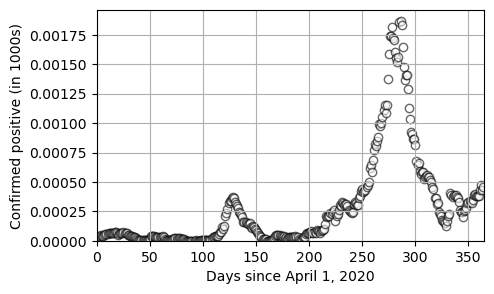

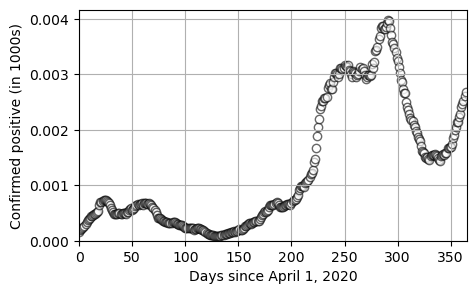

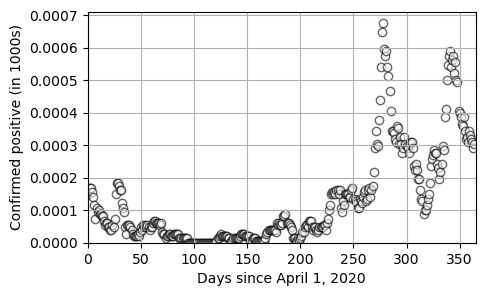

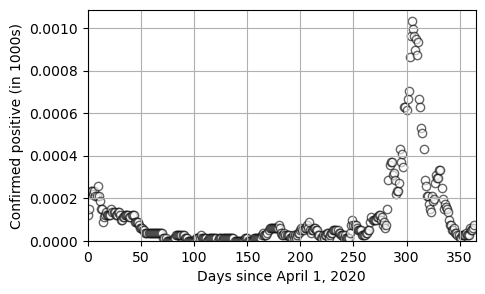

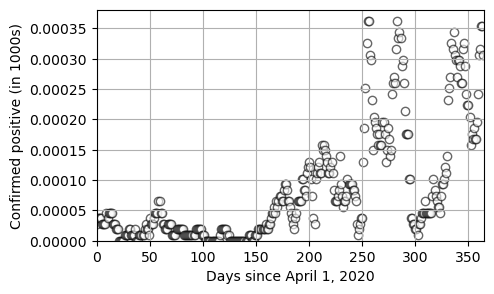

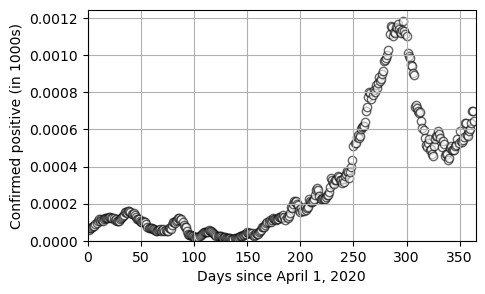

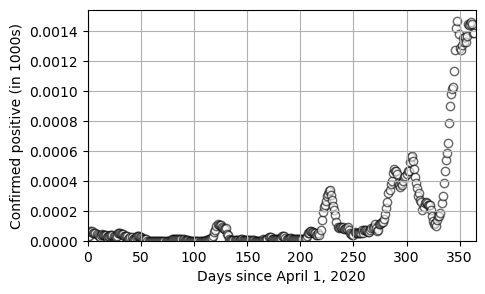

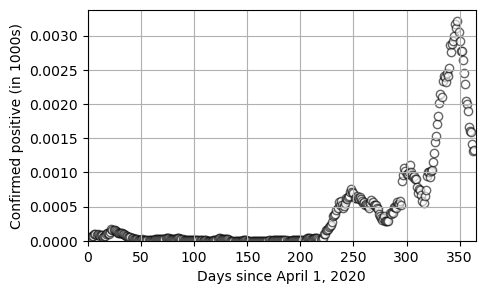

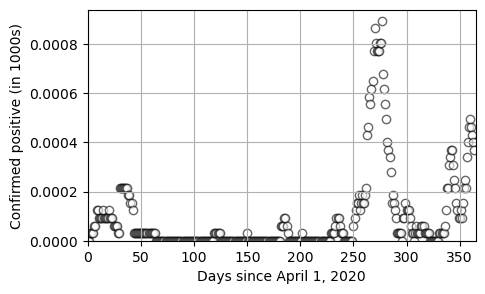

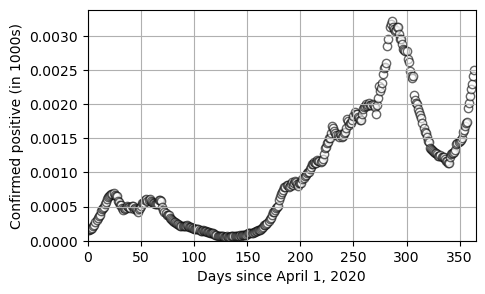

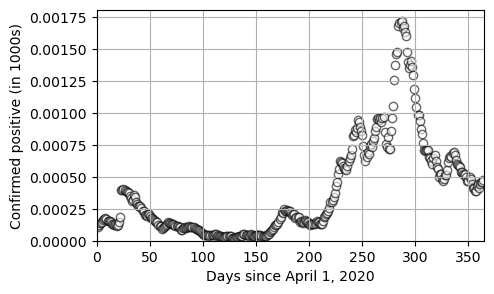

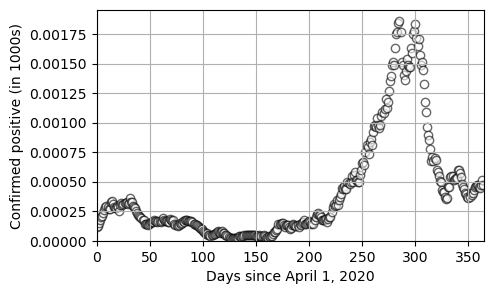

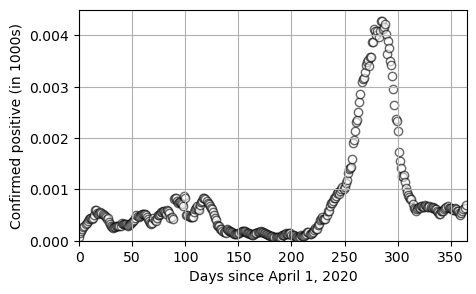

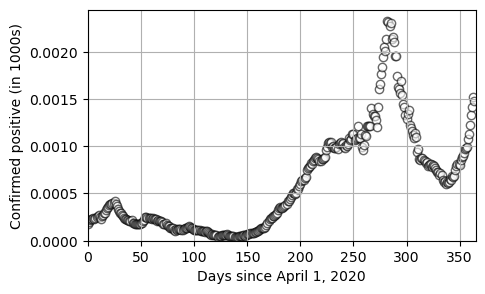

In [5]:
Ndays = 365
tdata = np.arange(0,Ndays)

for ii in range(34):
  yobs = Data[ii,:]
  np.savetxt('dat/data'+str(ii+1)+'.dat',yobs/population_by_phu[ii,1])

  # Population of Ontario 2020 14,726,000
  plt.figure(ii)
  f, ax = plt.subplots(1, figsize=(5,3))
  plt.scatter(tdata,yobs/population_by_phu[ii,1],color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
  plt.grid(True)
  plt.xlim([0,Ndays])
  plt.ylim(bottom=0)
  plt.xlabel('Days since April 1, 2020', fontsize=10)
  plt.ylabel(r'Confirmed positive (in 1000s)', fontsize=10)
  # plt.savefig('Case3_data.pdf',bbox_inches='tight')

  # f, ax = plt.subplots(1, figsize=(15,3))
  # plt.scatter(tdata,yobs/14726000,color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
  # plt.grid(True)
  # plt.xlim([0,Ndays])
  # plt.ylim([0,0.0025])
  # plt.xlabel('Time (days)', fontsize=12)
  # plt.ylabel('Reported active cases', fontsize=12)
  # plt.savefig('Case3_data.pdf',bbox_inches='tight')



<Figure size 640x480 with 0 Axes>

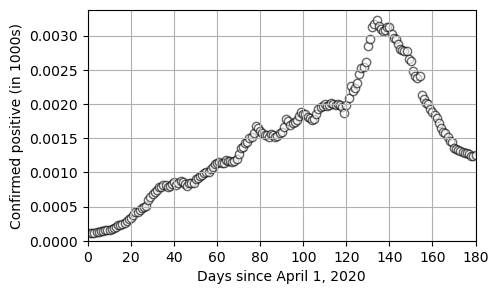

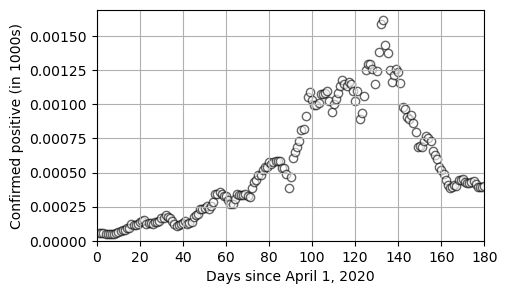

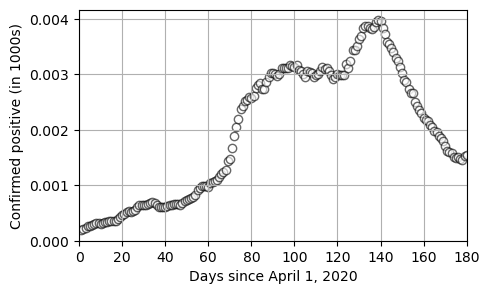

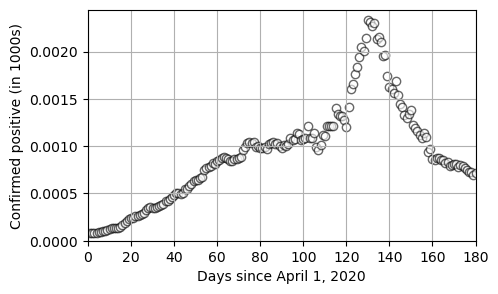

In [6]:
Ndays = 365
tdata = np.arange(0,Ndays)

index_toronto = np.array([29,3,21,33])

for ii in range(len(index_toronto)):
  index = index_toronto[ii]
  yobs = Data[index,:]
  np.savetxt('data'+str(ii+1)+'.dat',yobs/population_by_phu[ii,1])

  # Population of Ontario 2020 14,726,000
  plt.figure(ii)
  f, ax = plt.subplots(1, figsize=(5,3))
  plt.scatter(tdata[153:333]-152,yobs[153:333]/population_by_phu[index,1],color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
  plt.grid(True)
  plt.xlim([0,180])
  plt.ylim(bottom=0)
  plt.xlabel('Days since April 1, 2020', fontsize=10)
  plt.ylabel(r'Confirmed positive (in 1000s)', fontsize=10)


# Toronto and neighbouring PHUs

## City of Toronto

(0.0, 180.0)

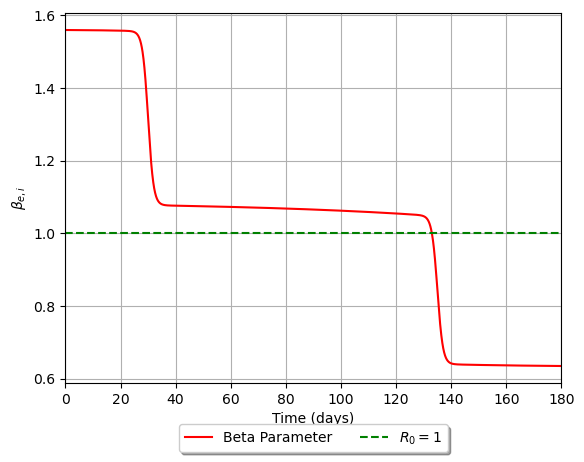

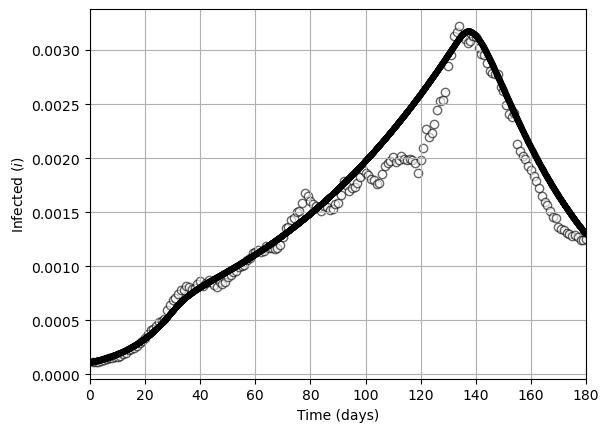

In [7]:
#!/usr/bin/python
import os, math, sys, random
import numpy as np
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
# i_data = i_data[-90:]
# d_data = d_data[-90:]

Ndays = 180
sampFac = 24 # sample every sampFac time step
dt = 1/24 # timestep
tgrd = 24*Ndays # time integration grid
tlist = np.linspace(0,Ndays,tgrd) # Define time axis

gamma_e = 1/16
gamma_i = 1/8
gamma_r = 1/12
gamma_d = 1/1000



Ytrue = np.zeros((5,tgrd))
I0 = Data[29,153]/population_by_phu[29,1]
D0 = 0
R0 = 0
S0 = 1 - 2*I0 - R0 - D0

Ytrue[:,0] = [S0,I0,I0,R0,D0]
beta = 0.165
gamma = 1/12

## beta = 0.833 gives R0=1

a0 =   0.13
a1 =  -0.04
t1 =  30
a2 =   0.0
t2 =  80
a3 =   0.0
t3 = 100
a4 =  -0.035
t4 = 135
a5 =  0.0
t5 = 160

beta_i = a0 + a1/(1 + np.exp((t1-tlist))) +  a2/(1 + np.exp((t2-tlist))) + a3/(1 + np.exp((t3-tlist))) + a4/(1 + np.exp((t4-tlist))) + a5/(1 + np.exp((t5-tlist)))
beta_e = beta_i

for kk in range(1,tgrd):
  Ytrue[0,kk] = Ytrue[0,kk-1] + dt*(-beta_e[kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] - beta_i[kk-1]*Ytrue[0,kk-1]*Ytrue[2,kk-1])
  Ytrue[1,kk] = Ytrue[1,kk-1] + dt*(beta_e[kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] + beta_i[kk-1]*Ytrue[0,kk-1]*Ytrue[2,kk-1] - (gamma_i + gamma_e)*Ytrue[1,kk-1])
  Ytrue[2,kk] = Ytrue[2,kk-1] + dt*(gamma_i*Ytrue[1,kk-1] - (gamma_r + gamma_d)*Ytrue[2,kk-1])
  Ytrue[3,kk] = Ytrue[3,kk-1] + dt*(gamma_e*Ytrue[1,kk-1] + gamma_r*Ytrue[2,kk-1])
  Ytrue[4,kk] = Ytrue[4,kk-1] + dt*(gamma_d*Ytrue[2,kk-1])


fig, ax = plt.subplots()
plt.figure(1)
plt.plot(tlist,Ytrue[0,0:]*beta_i/gamma,'r-', label=r'Beta Parameter')
plt.plot([0, Ndays],[1, 1],'g--', label=r'$R_0 = 1$')
plt.grid(True)
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.xlabel('Time (days)')
plt.ylabel(r'$\beta_{e,i}$')
plt.xlim([0,Ndays])
# plt.ylim([0,0.25])

# plt.figure(0)
# plt.plot(tlist,Ytrue[1,:],'r--', label=r'Syntheic Data')
# plt.grid(True)
# plt.xlabel('Time (days)')
# plt.ylabel(r'Exposed ($e$)')
# plt.xlim([0,Ndays])
# plt.ylim([0,0.0005])

plt.figure(2)
plt.plot(tlist,Ytrue[2,:],'k.', linewidth=3, label=r'Generating model')
plt.scatter(tdata[153:333]-152,Data[29,153:333]/population_by_phu[29,1],color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
plt.grid(True)
plt.xlabel('Time (days)')
plt.ylabel(r'Infected ($i$)')
plt.xlim([0,Ndays])
# plt.ylim([0,0.0005])


## Durham Region

696992.0


(0.0, 180.0)

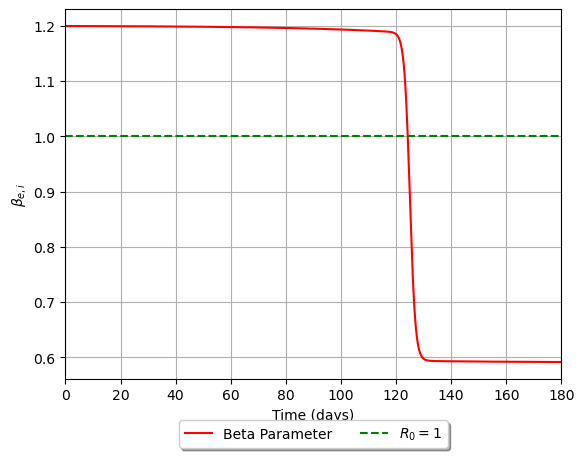

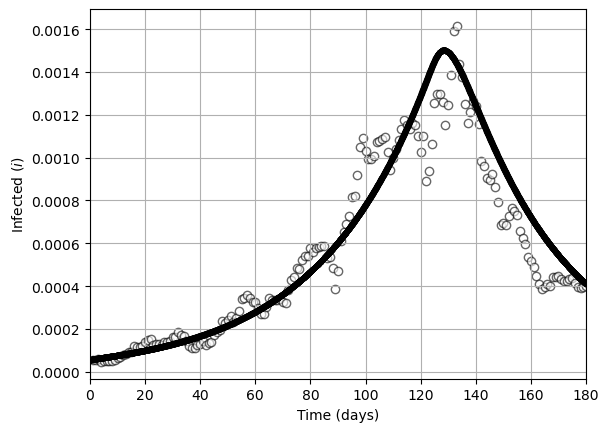

In [8]:
#!/usr/bin/python
import os, math, sys, random
import numpy as np
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
# i_data = i_data[-90:]
# d_data = d_data[-90:]

Ndays = 180
sampFac = 24 # sample every sampFac time step
dt = 1/24 # timestep
tgrd = 24*Ndays # time integration grid
tlist = np.linspace(0,Ndays,tgrd) # Define time axis

gamma_e = 1/16
gamma_i = 1/8
gamma_r = 1/12
gamma_d = 1/1000



Ytrue = np.zeros((5,tgrd))
I0 = Data[3,153]/population_by_phu[3,1]
D0 = 0
R0 = 0
S0 = 1 - 2*I0 - R0 - D0

print(population_by_phu[3,1])

Ytrue[:,0] = [S0,I0,I0,R0,D0]
gamma = 1/12

a0 =   0.1
a1 =  -0.05
t1 =  125
a2 =   0.0
t2 =  160
a3 =   0.0
t3 = 100
a4 =  0.0
t4 = 130
a5 =  0.0
t5 = 160

beta_i = a0 + a1/(1 + np.exp((t1-tlist))) +  a2/(1 + np.exp((t2-tlist))) + a3/(1 + np.exp((t3-tlist))) + a4/(1 + np.exp((t4-tlist))) + a5/(1 + np.exp((t5-tlist)))
beta_e = beta_i

for kk in range(1,tgrd):
  Ytrue[0,kk] = Ytrue[0,kk-1] + dt*(-beta_e[kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] - beta_i[kk-1]*Ytrue[0,kk-1]*Ytrue[2,kk-1])
  Ytrue[1,kk] = Ytrue[1,kk-1] + dt*(beta_e[kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] + beta_i[kk-1]*Ytrue[0,kk-1]*Ytrue[2,kk-1] - (gamma_i + gamma_e)*Ytrue[1,kk-1])
  Ytrue[2,kk] = Ytrue[2,kk-1] + dt*(gamma_i*Ytrue[1,kk-1] - (gamma_r + gamma_d)*Ytrue[2,kk-1])
  Ytrue[3,kk] = Ytrue[3,kk-1] + dt*(gamma_e*Ytrue[1,kk-1] + gamma_r*Ytrue[2,kk-1])
  Ytrue[4,kk] = Ytrue[4,kk-1] + dt*(gamma_d*Ytrue[2,kk-1])


fig, ax = plt.subplots()
plt.figure(1)
plt.plot(tlist,Ytrue[0,0:]*beta_i/gamma,'r-', label=r'Beta Parameter')
plt.plot([0, Ndays],[1, 1],'g--', label=r'$R_0 = 1$')
plt.grid(True)
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.xlabel('Time (days)')
plt.ylabel(r'$\beta_{e,i}$')
plt.xlim([0,Ndays])
# plt.ylim([0,0.25])

# plt.figure(0)
# plt.plot(tlist,Ytrue[1,:],'r--', label=r'Syntheic Data')
# plt.grid(True)
# plt.xlabel('Time (days)')
# plt.ylabel(r'Exposed ($e$)')
# plt.xlim([0,Ndays])
# plt.ylim([0,0.0005])

plt.figure(2)
plt.plot(tlist,Ytrue[2,:],'k.', linewidth=3, label=r'Generating model')
plt.scatter(tdata[153:333]-152,Data[3,153:333]/population_by_phu[3,1],color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
plt.grid(True)
plt.xlabel('Time (days)')
plt.ylabel(r'Infected ($i$)')
plt.xlim([0,Ndays])
# plt.ylim([0,0.0005])


## Peel Region

(0.0, 180.0)

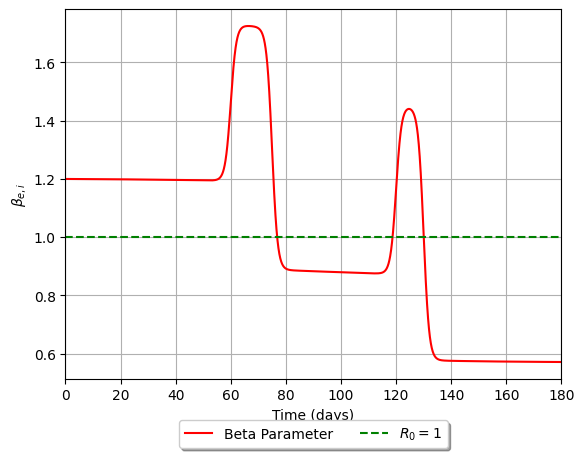

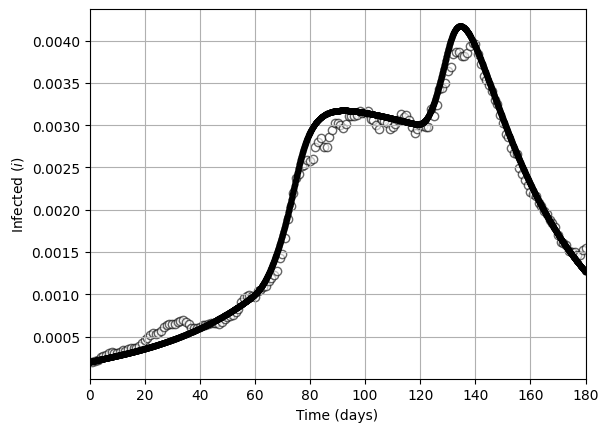

In [8]:
#!/usr/bin/python
import os, math, sys, random
import numpy as np
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
# i_data = i_data[-90:]
# d_data = d_data[-90:]

Ndays = 180
sampFac = 24 # sample every sampFac time step
dt = 1/24 # timestep
tgrd = 24*Ndays # time integration grid
tlist = np.linspace(0,Ndays,tgrd) # Define time axis

gamma_e = 1/16
gamma_i = 1/8
gamma_r = 1/12
gamma_d = 1/1000



Ytrue = np.zeros((5,tgrd))
I0 = Data[21,153]/population_by_phu[21,1]
D0 = 0
R0 = 0
S0 = 1 - 2*I0 - R0 - D0

Ytrue[:,0] = [S0,I0,I0,R0,D0]
beta = 0.165
gamma = 1/12

## beta = 0.833 gives R0=1

a0 =   0.1
a1 =  0.045
t1 =  60
a2 =   -0.07
t2 =  75
a3 =   0.05
t3 = 120
a4 = -0.075
t4 = 130
a5 =  0
t5 = 160

beta_i = a0 + a1/(1 + np.exp((t1-tlist))) +  a2/(1 + np.exp((t2-tlist))) + a3/(1 + np.exp((t3-tlist))) + a4/(1 + np.exp((t4-tlist))) + a5/(1 + np.exp((t5-tlist)))
beta_e = beta_i

for kk in range(1,tgrd):
  Ytrue[0,kk] = Ytrue[0,kk-1] + dt*(-beta_e[kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] - beta_i[kk-1]*Ytrue[0,kk-1]*Ytrue[2,kk-1])
  Ytrue[1,kk] = Ytrue[1,kk-1] + dt*(beta_e[kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] + beta_i[kk-1]*Ytrue[0,kk-1]*Ytrue[2,kk-1] - (gamma_i + gamma_e)*Ytrue[1,kk-1])
  Ytrue[2,kk] = Ytrue[2,kk-1] + dt*(gamma_i*Ytrue[1,kk-1] - (gamma_r + gamma_d)*Ytrue[2,kk-1])
  Ytrue[3,kk] = Ytrue[3,kk-1] + dt*(gamma_e*Ytrue[1,kk-1] + gamma_r*Ytrue[2,kk-1])
  Ytrue[4,kk] = Ytrue[4,kk-1] + dt*(gamma_d*Ytrue[2,kk-1])


fig, ax = plt.subplots()
plt.figure(1)
plt.plot(tlist,Ytrue[0,0:]*beta_i/gamma,'r-', label=r'Beta Parameter')
plt.plot([0, Ndays],[1, 1],'g--', label=r'$R_0 = 1$')
plt.grid(True)
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.xlabel('Time (days)')
plt.ylabel(r'$\beta_{e,i}$')
plt.xlim([0,Ndays])
# plt.ylim([0,0.25])

# plt.figure(0)
# plt.plot(tlist,Ytrue[1,:],'r--', label=r'Syntheic Data')
# plt.grid(True)
# plt.xlabel('Time (days)')
# plt.ylabel(r'Exposed ($e$)')
# plt.xlim([0,Ndays])
# plt.ylim([0,0.0005])

plt.figure(2)
plt.plot(tlist,Ytrue[2,:],'k.', linewidth=3, label=r'Generating model')
plt.scatter(tdata[153:333]-152,Data[21,153:333]/population_by_phu[21,1],color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
plt.grid(True)
plt.xlabel('Time (days)')
plt.ylabel(r'Infected ($i$)')
plt.xlim([0,Ndays])
# plt.ylim([0,0.0005])


## York Region

(0.0, 180.0)

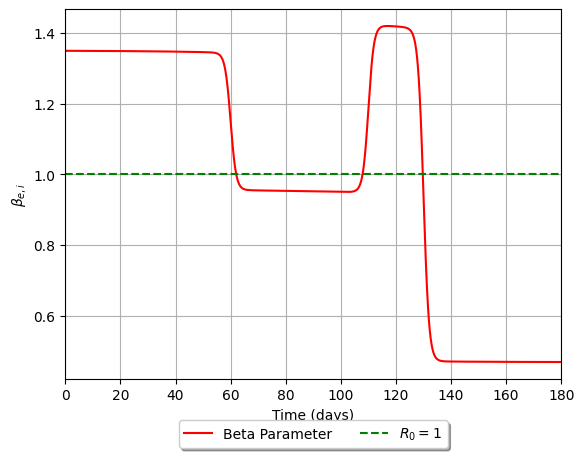

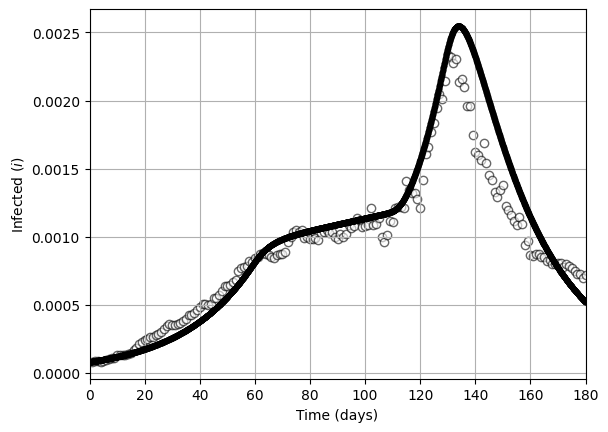

In [9]:
#!/usr/bin/python
import os, math, sys, random
import numpy as np
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
# i_data = i_data[-90:]
# d_data = d_data[-90:]

Ndays = 180
sampFac = 24 # sample every sampFac time step
dt = 1/24 # timestep
tgrd = 24*Ndays # time integration grid
tlist = np.linspace(0,Ndays,tgrd) # Define time axis

gamma_e = 1/16
gamma_i = 1/8
gamma_r = 1/12
gamma_d = 1/1000



Ytrue = np.zeros((5,tgrd))
I0 = Data[33,153]/population_by_phu[33,1]
D0 = 0
R0 = 0
S0 = 1 - 2*I0 - R0 - D0

Ytrue[:,0] = [S0,I0,I0,R0,D0]
beta = 0.165
gamma = 1/12

## beta = 0.833 gives R0=1

a0 =   0.1125
a1 =  -0.0325
t1 =  60
a2 =   0.04
t2 =  110
a3 =   0.0
t3 = 100
a4 =  -0.08
t4 = 130
a5 =  0.0
t5 = 160

beta_i = a0 + a1/(1 + np.exp((t1-tlist))) +  a2/(1 + np.exp((t2-tlist))) + a3/(1 + np.exp((t3-tlist))) + a4/(1 + np.exp((t4-tlist))) + a5/(1 + np.exp((t5-tlist)))
beta_e = beta_i

for kk in range(1,tgrd):
  Ytrue[0,kk] = Ytrue[0,kk-1] + dt*(-beta_e[kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] - beta_i[kk-1]*Ytrue[0,kk-1]*Ytrue[2,kk-1])
  Ytrue[1,kk] = Ytrue[1,kk-1] + dt*(beta_e[kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] + beta_i[kk-1]*Ytrue[0,kk-1]*Ytrue[2,kk-1] - (gamma_i + gamma_e)*Ytrue[1,kk-1])
  Ytrue[2,kk] = Ytrue[2,kk-1] + dt*(gamma_i*Ytrue[1,kk-1] - (gamma_r + gamma_d)*Ytrue[2,kk-1])
  Ytrue[3,kk] = Ytrue[3,kk-1] + dt*(gamma_e*Ytrue[1,kk-1] + gamma_r*Ytrue[2,kk-1])
  Ytrue[4,kk] = Ytrue[4,kk-1] + dt*(gamma_d*Ytrue[2,kk-1])


fig, ax = plt.subplots()
plt.figure(1)
plt.plot(tlist,Ytrue[0,0:]*beta_i/gamma,'r-', label=r'Beta Parameter')
plt.plot([0, Ndays],[1, 1],'g--', label=r'$R_0 = 1$')
plt.grid(True)
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.xlabel('Time (days)')
plt.ylabel(r'$\beta_{e,i}$')
plt.xlim([0,Ndays])
# plt.ylim([0,0.25])

# plt.figure(0)
# plt.plot(tlist,Ytrue[1,:],'r--', label=r'Syntheic Data')
# plt.grid(True)
# plt.xlabel('Time (days)')
# plt.ylabel(r'Exposed ($e$)')
# plt.xlim([0,Ndays])
# plt.ylim([0,0.0005])

plt.figure(2)
plt.plot(tlist,Ytrue[2,:],'k.', linewidth=3, label=r'Generating model')
plt.scatter(tdata[153:333]-152,Data[33,153:333]/population_by_phu[33,1],color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
plt.grid(True)
plt.xlabel('Time (days)')
plt.ylabel(r'Infected ($i$)')
plt.xlim([0,Ndays])
# plt.ylim([0,0.0005])


# City of Ottawa

(0.0, 180.0)

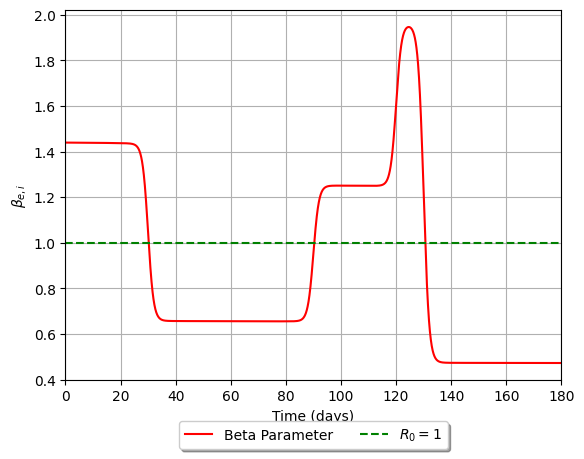

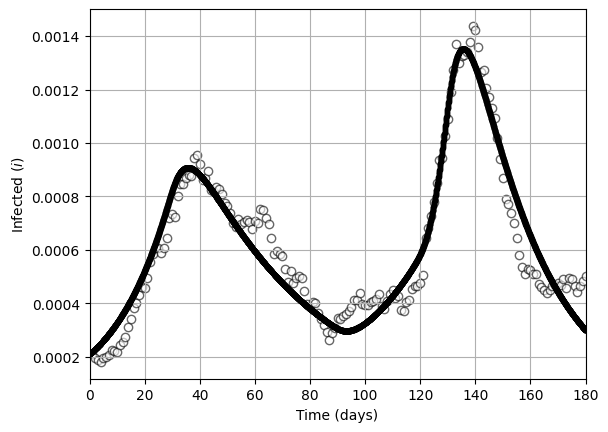

In [10]:
#!/usr/bin/python
import os, math, sys, random
import numpy as np
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
# i_data = i_data[-90:]
# d_data = d_data[-90:]

Ndays = 180
sampFac = 24 # sample every sampFac time step
dt = 1/24 # timestep
tgrd = 24*Ndays # time integration grid
tlist = np.linspace(0,Ndays,tgrd) # Define time axis

gamma_e = 1/16
gamma_i = 1/8
gamma_r = 1/12
gamma_d = 1/1000



Ytrue = np.zeros((5,tgrd))
I0 = Data[19,153]/population_by_phu[19,1]
D0 = 0
R0 = 0
S0 = 1 - 2*I0 - R0 - D0

Ytrue[:,0] = [S0,I0,I0,R0,D0]
beta = 0.165
gamma = 1/12

## beta = 0.833 gives R0=1

a0 =   0.12
a1 =  -0.065
t1 =  30
a2 =   0.05
t2 =  90
a3 =   0.06
t3 = 120
a4 =  -0.125
t4 = 130
a5 =  0.0
t5 = 160

beta_i = a0 + a1/(1 + np.exp((t1-tlist))) +  a2/(1 + np.exp((t2-tlist))) + a3/(1 + np.exp((t3-tlist))) + a4/(1 + np.exp((t4-tlist))) + a5/(1 + np.exp((t5-tlist)))
beta_e = beta_i

for kk in range(1,tgrd):
  Ytrue[0,kk] = Ytrue[0,kk-1] + dt*(-beta_e[kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] - beta_i[kk-1]*Ytrue[0,kk-1]*Ytrue[2,kk-1])
  Ytrue[1,kk] = Ytrue[1,kk-1] + dt*(beta_e[kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] + beta_i[kk-1]*Ytrue[0,kk-1]*Ytrue[2,kk-1] - (gamma_i + gamma_e)*Ytrue[1,kk-1])
  Ytrue[2,kk] = Ytrue[2,kk-1] + dt*(gamma_i*Ytrue[1,kk-1] - (gamma_r + gamma_d)*Ytrue[2,kk-1])
  Ytrue[3,kk] = Ytrue[3,kk-1] + dt*(gamma_e*Ytrue[1,kk-1] + gamma_r*Ytrue[2,kk-1])
  Ytrue[4,kk] = Ytrue[4,kk-1] + dt*(gamma_d*Ytrue[2,kk-1])


fig, ax = plt.subplots()
plt.figure(1)
plt.plot(tlist,Ytrue[0,0:]*beta_i/gamma,'r-', label=r'Beta Parameter')
plt.plot([0, Ndays],[1, 1],'g--', label=r'$R_0 = 1$')
plt.grid(True)
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.xlabel('Time (days)')
plt.ylabel(r'$\beta_{e,i}$')
plt.xlim([0,Ndays])
# plt.ylim([0,0.25])

# plt.figure(0)
# plt.plot(tlist,Ytrue[1,:],'r--', label=r'Syntheic Data')
# plt.grid(True)
# plt.xlabel('Time (days)')
# plt.ylabel(r'Exposed ($e$)')
# plt.xlim([0,Ndays])
# plt.ylim([0,0.0005])

plt.figure(2)
plt.plot(tlist,Ytrue[2,:],'k.', linewidth=3, label=r'Generating model')
plt.scatter(tdata[153:333]-152,Data[19,153:333]/population_by_phu[19,1],color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
plt.grid(True)
plt.xlabel('Time (days)')
plt.ylabel(r'Infected ($i$)')
plt.xlim([0,Ndays])
# plt.ylim([0,0.0005])


# Windsor

(0.0, 180.0)

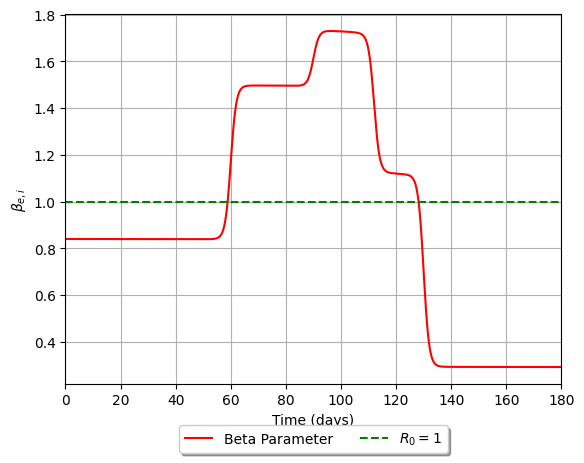

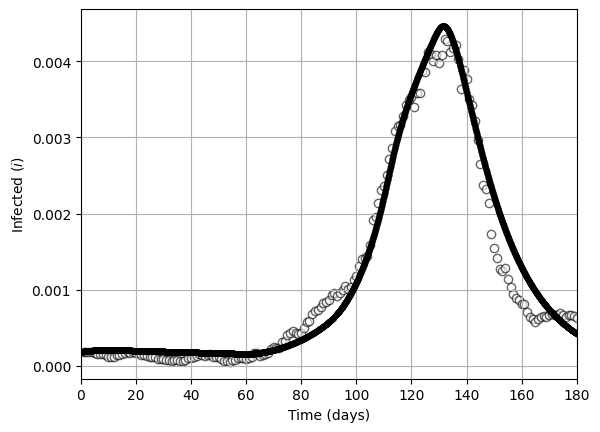

In [11]:
#!/usr/bin/python
import os, math, sys, random
import numpy as np
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
# i_data = i_data[-90:]
# d_data = d_data[-90:]

Ndays = 180
sampFac = 24 # sample every sampFac time step
dt = 1/24 # timestep
tgrd = 24*Ndays # time integration grid
tlist = np.linspace(0,Ndays,tgrd) # Define time axis

gamma_e = 1/16
gamma_i = 1/8
gamma_r = 1/12
gamma_d = 1/1000



Ytrue = np.zeros((5,tgrd))
I0 = Data[32,153]/population_by_phu[32,1]
D0 = 0
R0 = 0
S0 = 1 - 2*I0 - R0 - D0

Ytrue[:,0] = [S0,I0,I0,R0,D0]
beta = 0.165
gamma = 1/12

## beta = 0.833 gives R0=1

a0 =   0.07
a1 =  0.055
t1 =  60
a2 =   0.02
t2 =  90
a3 =   -0.05
t3 = 112
a4 =  -0.07
t4 = 130
a5 =  0.0
t5 = 160

beta_i = a0 + a1/(1 + np.exp((t1-tlist))) +  a2/(1 + np.exp((t2-tlist))) + a3/(1 + np.exp((t3-tlist))) + a4/(1 + np.exp((t4-tlist))) + a5/(1 + np.exp((t5-tlist)))
beta_e = beta_i

for kk in range(1,tgrd):
  Ytrue[0,kk] = Ytrue[0,kk-1] + dt*(-beta_e[kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] - beta_i[kk-1]*Ytrue[0,kk-1]*Ytrue[2,kk-1])
  Ytrue[1,kk] = Ytrue[1,kk-1] + dt*(beta_e[kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] + beta_i[kk-1]*Ytrue[0,kk-1]*Ytrue[2,kk-1] - (gamma_i + gamma_e)*Ytrue[1,kk-1])
  Ytrue[2,kk] = Ytrue[2,kk-1] + dt*(gamma_i*Ytrue[1,kk-1] - (gamma_r + gamma_d)*Ytrue[2,kk-1])
  Ytrue[3,kk] = Ytrue[3,kk-1] + dt*(gamma_e*Ytrue[1,kk-1] + gamma_r*Ytrue[2,kk-1])
  Ytrue[4,kk] = Ytrue[4,kk-1] + dt*(gamma_d*Ytrue[2,kk-1])


fig, ax = plt.subplots()
plt.figure(1)
plt.plot(tlist,Ytrue[0,0:]*beta_i/gamma,'r-', label=r'Beta Parameter')
plt.plot([0, Ndays],[1, 1],'g--', label=r'$R_0 = 1$')
plt.grid(True)
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)
plt.xlabel('Time (days)')
plt.ylabel(r'$\beta_{e,i}$')
plt.xlim([0,Ndays])
# plt.ylim([0,0.25])

# plt.figure(0)
# plt.plot(tlist,Ytrue[1,:],'r--', label=r'Syntheic Data')
# plt.grid(True)
# plt.xlabel('Time (days)')
# plt.ylabel(r'Exposed ($e$)')
# plt.xlim([0,Ndays])
# plt.ylim([0,0.0005])

plt.figure(2)
plt.plot(tlist,Ytrue[2,:],'k.', linewidth=3, label=r'Generating model')
plt.scatter(tdata[153:333]-152,Data[32,153:333]/population_by_phu[32,1],color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
plt.grid(True)
plt.xlabel('Time (days)')
plt.ylabel(r'Infected ($i$)')
plt.xlim([0,Ndays])
# plt.ylim([0,0.0005])
